In [2]:
%pylab inline
import numpy as np
import io
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [23]:
knldata = """\
# Testing multiprocessing sum(sin(range(10000000)))
# Processing 64 batches with ncpu processes
# method ncpu time     rate
purepy   1  706.088    0.091
numpy    1  138.151    0.463
numba    1  127.948    0.500
purepy   2  352.840    0.181
numpy    2   69.558    0.920
numba    2   63.764    1.004
purepy   4  185.846    0.344
numpy    4   34.982    1.830
numba    4   31.919    2.005
purepy   8  109.140    0.586
numpy    8   17.874    3.581
numba    8   17.511    3.655
purepy  16   54.533    1.174
numpy   16    9.410    6.801
numba   16    8.425    7.597
purepy  32   27.814    2.301
numpy   32    5.945   10.765
numba   32    4.375   14.629
purepy  64   14.153    4.522
numpy   64    4.765   13.430
numba   64    2.315   27.644
"""
# Testing multiprocessing sum(sin(range(10000000)))
# Processing 128 batches with ncpu processes
# method ncpu time     rate

hswdata = """# Testing multiprocessing sum(sin(range(10000000)))
# Processing 128 batches with ncpu processes
# method ncpu time     rate
purepy   1  246.378    0.520
numpy    1   53.248    2.404
numba    1   41.816    3.061
purepy   2  123.157    1.039
numpy    2   26.678    4.798
numba    2   20.968    6.105
purepy   4   62.231    2.057
numpy    4   13.462    9.508
numba    4   10.608   12.066
purepy   8   34.503    3.710
numpy    8    7.317   17.492
numba    8    5.844   21.901
purepy  16   25.316    5.056
numpy   16    4.361   29.350
numba   16    3.348   38.229
purepy  32   12.202   10.490
numpy   32    2.634   48.595
numba   32    2.225   57.526
purepy  64   11.021   11.614
numpy   64    1.915   66.844
numba   64    1.309   97.779
"""

def parse_data(datastr):
    method = list()
    nproc = list()
    rate = list()
    for line in datastr.split('\n'):
        line = line.strip()
        if line.startswith('#') or len(line)<2:
            continue
        x = line.split()
        method.append(x[0])
        nproc.append(int(x[1]))
        rate.append(float(x[3]))
    return Table(dict(method=method, nproc=nproc, rate=rate))

hsw = parse_data(hswdata)
knl = parse_data(knldata)

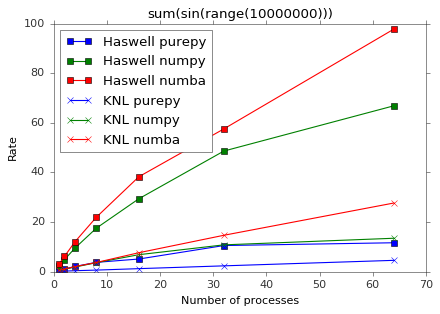

In [38]:
def plotit(data, label, marker='s'):
    for method, color in zip(('purepy', 'numpy', 'numba'), ('b', 'g', 'r')):
        ii = data['method'] == method
        fmt = color+marker+'-'
        plot(data['nproc'][ii], data['rate'][ii], fmt, label=label+' '+method)

plotit(hsw, 'Haswell', 's')
plotit(knl, 'KNL', 'x')
legend(loc='upper left')

xlabel('Number of processes')
ylabel('Rate')
title('sum(sin(range(10000000)))')
savefig('loopsine.png')

(0, 10)

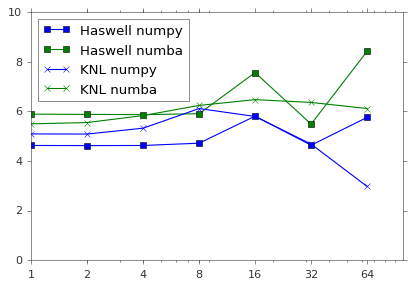

In [36]:
def plotit(data, label, marker='s'):
    iipy = data['method'] == 'purepy'
    for method, color in zip(('numpy', 'numba'), ('b', 'g', 'r')):
        ii = data['method'] == method
        assert np.all(data['nproc'][ii] == data['nproc'][iipy])
        x = data['nproc'][ii]
        y = data['rate'][ii] / data['rate'][iipy]
        fmt = color+marker+'-'
        plot(x, y, fmt, label=label+' '+method)
        semilogx()
        xticks(x,x)

plotit(hsw, 'Haswell', 's')
plotit(knl, 'KNL', 'x')
legend(loc='upper left')
ylabel('speedup over purepy1.8')
ylim(0,10)



In [37]:
1.89/0.41, 10.85/2.19

(4.609756097560975, 4.954337899543379)